In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import datetime
from datetime import date
from datetime import time
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from collections import Counter

sns.set()

train = pd.read_csv('F:/fsociety/HACKATHONS/Datawiz/round 2/datawiz19round2/train.csv')
test = pd.read_csv('F:/fsociety/HACKATHONS/Datawiz/round 2/datawiz19round2/test.csv')

In [2]:
train.drop(['Id'],axis = 1 , inplace = True)
train.drop(['employer_url'],axis = 1 , inplace = True)

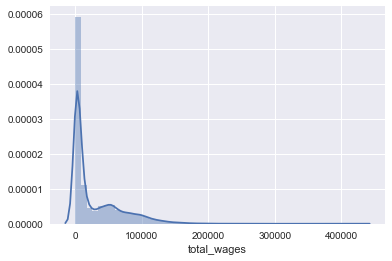

In [3]:
#histogram
sns.distplot(train['total_wages'])

In [4]:
#skewness and kurtosis
print("Skewness: %f" % train['total_wages'].skew())
print("Kurtosis: %f" % train['total_wages'].kurt())

Skewness: 1.771369
Kurtosis: 4.336737


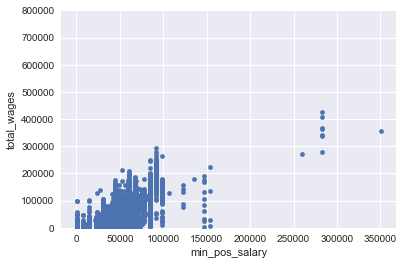

In [5]:
#scatter plot min_sal/total_wages
var = 'min_pos_salary'
data = pd.concat([train['total_wages'], train[var]], axis=1)
data.plot.scatter(x=var, y='total_wages', ylim=(0,800000));

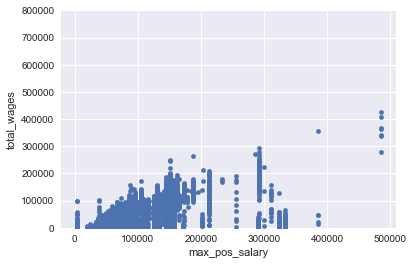

In [6]:
#scatter plot max_sal/total_wages
var = 'max_pos_salary'
data = pd.concat([train['total_wages'], train[var]], axis=1)
data.plot.scatter(x=var, y='total_wages', ylim=(0,800000));

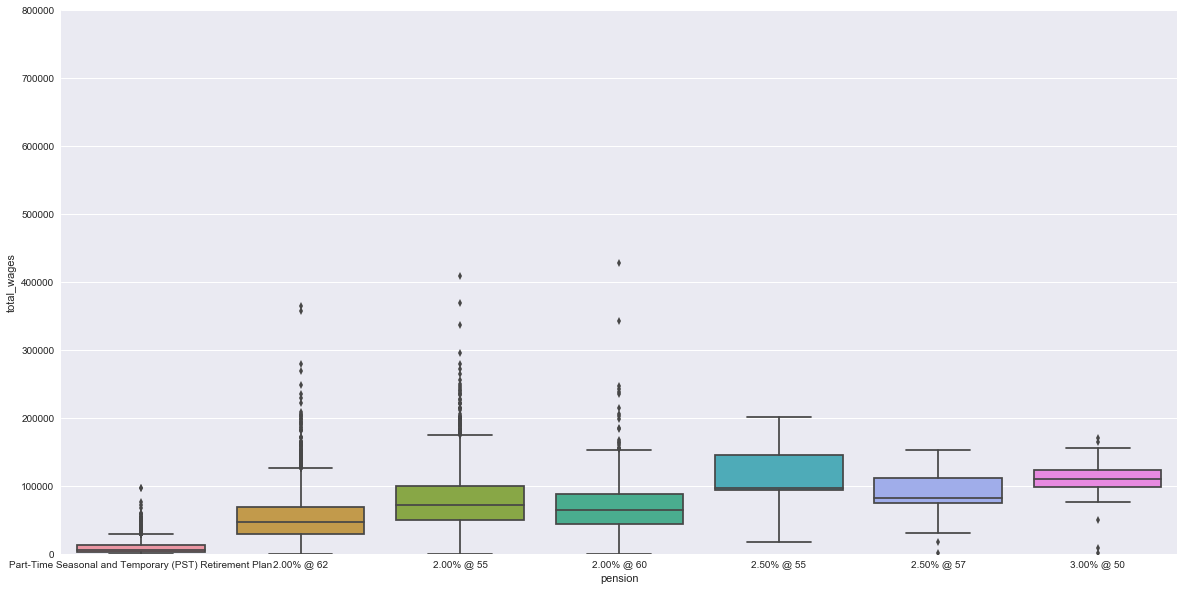

In [7]:
#categorical features
var = 'pension'
data = pd.concat([train['total_wages'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10 ))
fig = sns.boxplot(x=var, y="total_wages", data=data)
fig.axis(ymin=0, ymax=800000);

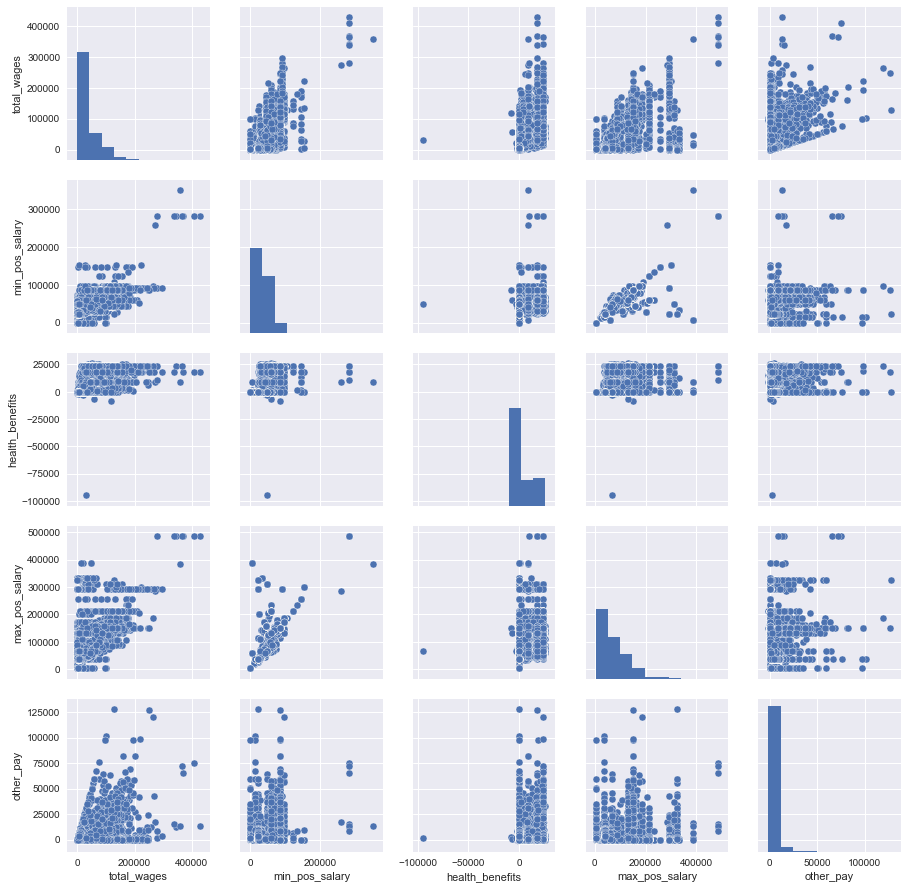

In [8]:
cols = ['total_wages', 'min_pos_salary', 'health_benefits', 'max_pos_salary' , 'other_pay']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [9]:
New_other_pay = train.other_pay.clip_lower(650.0)
train = train.assign(New_other_pay = New_other_pay)

In [10]:
New_retirement_cost_covered = train.retirement_cost_covered.clip_lower(0)
train = train.assign(New_retirement_cost_covered = New_retirement_cost_covered)


In [11]:
train['New_retirement_cost_covered'] = train['New_retirement_cost_covered'].fillna(0)
train['location'] = train['location'].fillna('Ahmedabad')

In [12]:
New_lump_sum_pay = train.lump_sum_pay.clip_lower(0)
train = train.assign(New_lump_sum_pay = New_lump_sum_pay)

In [13]:
train['New_lump_sum_pay']=train['New_lump_sum_pay'].fillna(0)
train['pension'] = train['pension'].fillna('2.00%')

In [14]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X = LabelEncoder()
train['employer'] = labelencoder_X.fit_transform(train['employer'])
#train['employer_url'] = labelencoder_X.fit_transform(train['employer_url'])
train['location'] = labelencoder_X.fit_transform(train['location'])
train['pension'] = labelencoder_X.fit_transform(train['pension'])

#label encoder of pension is still not precise there are more than 3 categories

In [15]:
from datetime import datetime
train['DOB'] = pd.to_datetime(train.DOB)
#train['month'] = train['DOB'].dt.month
#train['dayofweek'] = train['DOB'].dt.dayofweek

train['year'] = train['DOB'].dt.year
#train['day'] = train['DOB'].dt.day
train['dayofyear'] = train['DOB'].dt.dayofyear
#train['weekofyear'] = train['DOB'].dt.weekofyear

In [16]:
train.drop(['other_pay' , 'retirement_cost_covered' , 'lump_sum_pay' , 'DOB'  , 'location' ,'New_retirement_cost_covered'  ], axis=1, inplace=True)


In [17]:
#train.drop(['other_pay' , 'retirement_cost_covered' , 'lump_sum_pay' , 'DOB'  , 'location' ,'New_retirement_cost_covered' , 'year'  , 'employer' , 'dayofyear'], axis=1, inplace=True)


In [18]:
train.head()

,employer,min_pos_salary,max_pos_salary,overtime_pay,health_benefits,pension,total_wages,New_other_pay,New_lump_sum_pay,year,dayofyear
0,6,22879.56,291194.40,0.0,0.00,7,1614.00,650.00,0.0,1968,319
1,15,22879.56,38749.56,0.0,0.00,0,596.85,650.00,0.0,1982,57
2,18,22879.56,38749.56,0.0,0.00,0,1040.13,1040.13,0.0,1957,230
3,2,31200.00,48888.00,0.0,9319.08,3,37752.64,5399.60,0.0,1971,35
4,3,49512.00,66192.00,0.0,0.00,7,21728.98,2697.00,0.0,1970,117


### Normalize

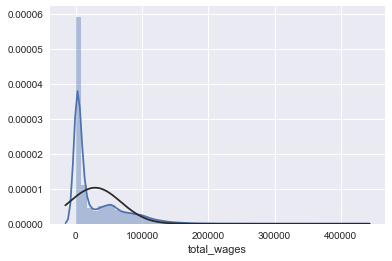

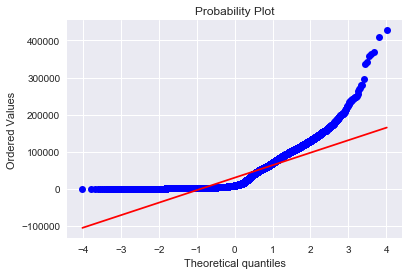

In [19]:
#histogram and normal probability plot
sns.distplot(train['total_wages'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['total_wages'], plot=plt)


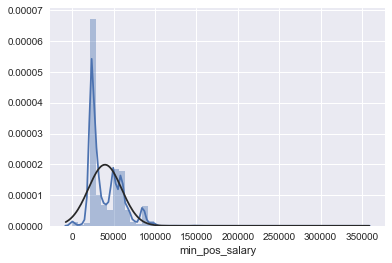

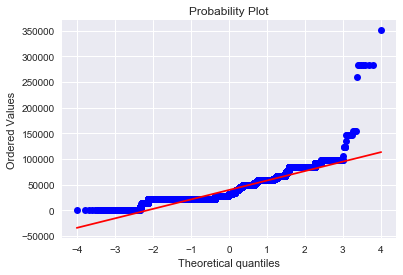

In [20]:
#histogram and normal probability plot
sns.distplot(train['min_pos_salary'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['min_pos_salary'], plot=plt)

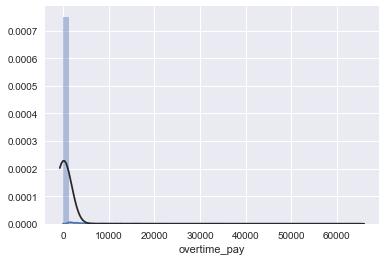

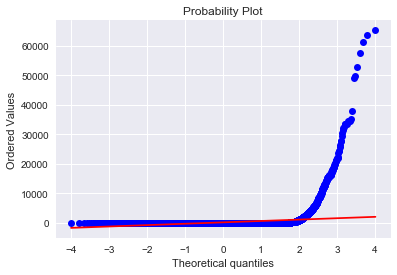

In [21]:
sns.distplot(train['overtime_pay'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['overtime_pay'], plot=plt)

In [22]:
#train['New_other_pay'] = np.log(train['New_other_pay'])
#train['min_pos_salary'] = np.log(train['min_pos_salary'])
#train['max_pos_salary'] = np.log(train['max_pos_salary'])
#train['total_wages'] = np.log(train['total_wages'])



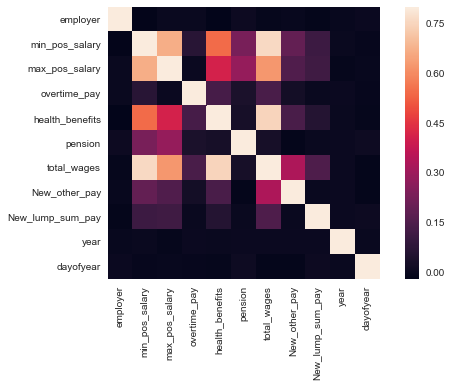

In [23]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(9, 5))
sns.heatmap(corrmat, vmax=.8, square=True);


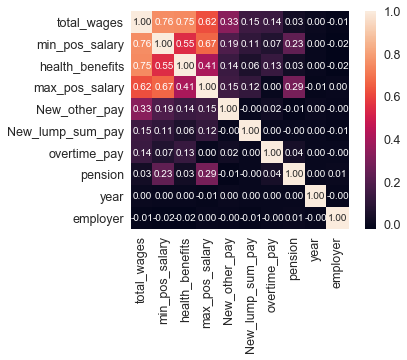

In [24]:
#total_wages correlation matrix

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'total_wages')['total_wages'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Train

In [25]:
y = train["total_wages"]
X = train.drop(["total_wages"],axis=1)

In [26]:
from sklearn.model_selection import train_test_split 
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) #stdsca,esti,fulltrain,algo

In [27]:
from sklearn.ensemble import RandomForestRegressor
lr = RandomForestRegressor(random_state=42)
lr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error,r2_score
y_pred= lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
lmse = mean_squared_log_error(y_test, y_pred)
rmse = np.sqrt(mse)
lrmse = np.sqrt(lmse)
print("R2 score:", r2)
print("MAE:", mae)
print("MSE:", mse)
#print("LMSE:", lmse)
print("RMSE:", rmse)
#print("LRMSE:", lrmse)                   

R2 score: 0.9180879173926451
MAE: 5853.645036014493
MSE: 115916649.72421113
RMSE: 10766.45947952302


In [29]:
#R2 score: 0.9171032825742218
#MAE: 5943.990685390786
#MSE: 117310040.85431497
#RMSE: 10830.975988077666

In [30]:
#R2 score: 0.919357492635139
#MAE: 5723.615172150987
#MSE: 114120029.44551383
#RMSE: 10682.697667046177

In [31]:
from datetime import datetime
test['DOB'] = pd.to_datetime(test.DOB)
#test['month'] = test['DOB'].dt.month
#test['dayofweek'] = test['DOB'].dt.dayofweek

test['year'] = test['DOB'].dt.year
#test['day'] = test['DOB'].dt.day
test['dayofyear'] = test['DOB'].dt.dayofyear
#test['weekofyear'] = test['DOB'].dt.weekofyear

In [32]:



test = test.assign(New_other_pay = New_other_pay)
test = test.assign(New_retirement_cost_covered = New_retirement_cost_covered)
test = test.assign(New_lump_sum_pay = New_lump_sum_pay)


In [33]:
#test['New_other_pay'] = np.log(test['New_other_pay'])
#test['min_pos_salary'] = np.log(test['min_pos_salary'])
#test['max_pos_salary'] = np.log(test['max_pos_salary'])

In [34]:
test.head()

,Id,employer,min_pos_salary,max_pos_salary,overtime_pay,lump_sum_pay,other_pay,retirement_cost_covered,health_benefits,DOB,pension,employer_url,location,year,dayofyear,New_other_pay,New_retirement_cost_covered,New_lump_sum_pay
0,23000,Maharaja Sayajirao University of Baroda,49512.00,66192.00,0.0,0.0,2576.11,0.0,0.00,1963-04-26,Part-Time Seasonal and Temporary (PST) Retirem...,msubaroda.ac.in,Vadodara,1963,116,650.00,0.0,0.0
1,23001,Saurashtra University,37380.00,65700.00,0.0,0.0,493.05,NaN,11605.58,1955-04-27,2.00% @ 62,saurashtrauniversity.edu,Rajkot,1955,117,650.00,NaN,0.0
2,23002,Navsari Agricultural University,85188.00,150792.00,0.0,0.0,0.00,NaN,23270.64,1976-01-06,2.00% @ 55,www.nau.in,Navsari,1976,6,1040.13,0.0,0.0
3,23003,Gujarat Technological University,50148.00,71304.00,0.0,0.0,1023.79,NaN,17631.72,1953-08-20,2.00% @ 55,gtu.ac.in,Ahmedabad,1953,232,5399.60,NaN,0.0
4,23004,Ganpat University,22879.56,38749.56,0.0,0.0,1391.50,0.0,0.00,1958-09-17,NaN,gu.ac.in,Mehsana,1958,260,2697.00,0.0,0.0


In [35]:
test['location'] = test['location'].fillna('Ahmedabad')
test['pension'] = test['pension'].fillna('2.00%')
test['New_lump_sum_pay']=test['New_lump_sum_pay'].fillna(0)


In [36]:
Id = test['Id']

test.drop([ 'Id' , 'other_pay' , 'retirement_cost_covered' , 'lump_sum_pay' , 'DOB'  , 'location' ,'New_retirement_cost_covered' , 'employer_url'  ], axis=1, inplace=True)

#test.drop(['Id'], axis=1, inplace=True)
#test.drop(['DOB'], axis=1, inplace=True)
#test.drop(['employer_url'], axis=1, inplace=True)
#test.drop(['employer'], axis=1, inplace=True)
#test.drop(['retirement_cost_covered'], axis=1, inplace=True)
#test.drop(['location'], axis=1, inplace=True)
#test.drop(['pension'], axis=1, inplace=True)

In [37]:
test['pension']=test['pension'].str.split(expand=True)

In [38]:
test.head()

,employer,min_pos_salary,max_pos_salary,overtime_pay,health_benefits,pension,year,dayofyear,New_other_pay,New_lump_sum_pay
0,Maharaja Sayajirao University of Baroda,49512.00,66192.00,0.0,0.00,Part-Time,1963,116,650.00,0.0
1,Saurashtra University,37380.00,65700.00,0.0,11605.58,2.00%,1955,117,650.00,0.0
2,Navsari Agricultural University,85188.00,150792.00,0.0,23270.64,2.00%,1976,6,1040.13,0.0
3,Gujarat Technological University,50148.00,71304.00,0.0,17631.72,2.00%,1953,232,5399.60,0.0
4,Ganpat University,22879.56,38749.56,0.0,0.00,2.00%,1958,260,2697.00,0.0


In [39]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X = LabelEncoder()
test['employer'] = labelencoder_X.fit_transform(test['employer'])
#test['employer_url'] = labelencoder_X.fit_transform(test['employer_url'])
#test['location'] = labelencoder_X.fit_transform(test['location'])
test['pension'] = labelencoder_X.fit_transform(test['pension'])

In [40]:
test.head()

,employer,min_pos_salary,max_pos_salary,overtime_pay,health_benefits,pension,year,dayofyear,New_other_pay,New_lump_sum_pay
0,15,49512.00,66192.00,0.0,0.00,3,1963,116,650.00,0.0
1,20,37380.00,65700.00,0.0,11605.58,0,1955,117,650.00,0.0
2,16,85188.00,150792.00,0.0,23270.64,0,1976,6,1040.13,0.0
3,8,50148.00,71304.00,0.0,17631.72,0,1953,232,5399.60,0.0
4,4,22879.56,38749.56,0.0,0.00,0,1958,260,2697.00,0.0


In [41]:
train.head()

,employer,min_pos_salary,max_pos_salary,overtime_pay,health_benefits,pension,total_wages,New_other_pay,New_lump_sum_pay,year,dayofyear
0,6,22879.56,291194.40,0.0,0.00,7,1614.00,650.00,0.0,1968,319
1,15,22879.56,38749.56,0.0,0.00,0,596.85,650.00,0.0,1982,57
2,18,22879.56,38749.56,0.0,0.00,0,1040.13,1040.13,0.0,1957,230
3,2,31200.00,48888.00,0.0,9319.08,3,37752.64,5399.60,0.0,1971,35
4,3,49512.00,66192.00,0.0,0.00,7,21728.98,2697.00,0.0,1970,117


In [42]:
prediction_test=lr.predict(test)

In [43]:
my_solution=pd.DataFrame(prediction_test,Id,columns=["total_wages"])
print(my_solution.shape)

(7929, 1)


In [44]:
my_solution.to_csv("prediction21_3_simple3.csv",index_label=["Id"])

In [45]:
my_solution.shape

(7929, 1)

In [46]:
my_solution['total_wages'].value_counts()

3647.275      198
3011.975      100
3021.525       59
3010.550       53
3011.139       48
24181.471      48
3010.185       47
3224.850       47
3009.705       43
3784.530       42
3234.175       39
3022.000       38
17337.883      36
3222.355       34
3223.200       32
50342.266      27
3224.625       27
3031.225       26
3496.175       26
45220.084      26
3022.925       26
3010.325       25
3880.665       25
5954.302       25
3008.950       24
3020.585       24
3653.875       23
14293.091      23
3304.825       23
18904.888      22
             ... 
90713.427       1
73372.953       1
2262.495        1
12366.799       1
13406.287       1
43608.694       1
86656.696       1
10624.586       1
51823.655       1
86540.671       1
57846.957       1
48693.410       1
3065.585        1
14905.149       1
67172.625       1
3635.180        1
50705.595       1
51031.275       1
213141.490      1
6144.441        1
117621.158      1
106238.937      1
34895.964       1
61943.144       1
3285.400  